<a href="https://colab.research.google.com/github/karthikreddy0123/karthikreddy0123/blob/main/Copy_of_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

Problem Definition:
The goal of this problem is to detect fraudulent credit card transactions using machine learning. The dataset consists of credit card transactions, where each transaction is represented by a number of features such as time, transaction amount, and anonymized variables (V1 to V28). The target variable Class indicates whether the transaction is legitimate (0) or fraudulent (1). The challenge is to develop a predictive model that can accurately classify transactions as legitimate or fraudulent, given the features.

Why this Problem:
Credit card fraud is a major concern for financial institutions and consumers. Fraudulent transactions cause financial losses and damage to reputations. Detecting fraudulent transactions in real-time is essential to prevent further damage. However, the problem is challenging because the dataset is highly imbalanced — there are far fewer fraudulent transactions compared to legitimate ones. This imbalance can bias the model, making it more likely to classify transactions as legitimate, even when they are fraudulent.

numpy: This is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

pandas: A powerful data manipulation and analysis library that provides data structures like DataFrames, which are particularly useful for handling structured data (i.e., data in tables).

sklearn.model_selection.train_test_split: This function is used to split your dataset into two parts: a training set (used to train your machine learning model) and a test set (used to evaluate your model). It helps ensure that the model is tested on data that it hasn’t already seen, which helps evaluate its generalization performance.

sklearn.linear_model.LogisticRegression: This is the Logistic Regression model from scikit-learn, which is commonly used for classification tasks. It's a linear model that models the probability of a binary outcome (or multi-class with extensions). It's particularly useful for problems like spam detection or predicting customer churn.

sklearn.metrics.accuracy_score: This function computes the accuracy of a classifier by comparing the true labels (from the test set) to the predicted labels. Accuracy is defined as the fraction of correct predictions out of the total predictions.

google.colab.drive: This is the Google Colab integration for accessing files from your Google Drive. By mounting your Google Drive, you can read/write files directly from your Colab environment, making it convenient for working with datasets stored in the cloud.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.metrics import accuracy_score
from google.colab import drive

is used in Google Colab to mount your Google Drive into the Colab environment so you can access files from it directly.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

pd.read_csv():

This is a function from the Pandas library, which is a powerful Python package for data manipulation and analysis.
The function reads a CSV (Comma-Separated Values) file and loads it into a Pandas DataFrame.
A DataFrame is a 2-dimensional, tabular data structure similar to a spreadsheet or SQL table, where data is stored in rows and columns.
File Path:

'/content/drive/MyDrive/Colab Notebooks/creditcard.csv' is the file path to your dataset.
This path is specific to Google Colab, where /content/drive/ is the mounted Google Drive directory. By using Google Drive, you can store your datasets and access them directly from Colab.
Assigning to a Variable:

credit_card_data is the variable that stores the loaded DataFrame. After this line of code, you can use credit_card_data to explore, analyze, and manipulate the data.

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Displays the last 5 rows of your DataFrame by default
Check the End of Your Data:

It is often used to inspect the last few rows of the dataset, which might contain missing or unusual data entries.
Data Validation:

This can be helpful to verify the data integrity, especially after data manipulation operations like filtering, sorting, or appending rows.
Data Structure Insight:

It helps you confirm if there are any extra or irrelevant rows at the end (e.g., summary rows, footer text from CSV exports).

In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


credit_card_data['Class']:

This selects the Class column from the DataFrame.
The Class column typically indicates whether a transaction is legit (0) or fraudulent (1).
value_counts():

This function counts the frequency of each unique value in the column and returns it as a Series.
By default, it sorts the counts in descending order, so the most common class appears first.

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

This code separates the dataset into two subsets:

legit:

This DataFrame contains only the legitimate (non-fraudulent) transactions.
It is created by filtering rows where the Class column is equal to 0.
fraud:

This DataFrame contains only the fraudulent transactions.
It is created by filtering rows where the Class column is equal to 1.
Detailed Breakdown
Filtering the DataFrame:

credit_card_data.Class == 0 creates a boolean mask (True/False) for the entire DataFrame, where each row is evaluated based on the condition:
If Class is 0 (legit transaction), the mask is True.
If Class is 1 (fraudulent transaction), the mask is False.
credit_card_data[credit_card_data.Class == 0] uses this mask to return only the rows where the mask is True.
Assigning to Variables:

The filtered data is stored in the variables legit and fraud for easier analysis.

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

legit.shape → (284315, 31):

This means the legit DataFrame has:
284,315 rows, which are the records of legitimate transactions.
31 columns, which include features like Time, V1, V2, ..., Amount, and Class.
fraud.shape → (492, 31):

This means the fraud DataFrame has:
492 rows, which are the records of fraudulent transactions.
31 columns, same as the legit DataFrame

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78551,57582.0,-1.049627,0.693812,1.029178,0.291570,-0.675456,0.119281,0.590093,0.531204,-0.083686,...,0.127882,0.387131,0.208049,0.126315,-0.127959,0.390095,0.204436,0.145075,139.00,0
240850,150780.0,-1.688172,2.390904,-2.011101,-1.658967,1.059338,-0.913552,1.186585,0.217994,0.238486,...,0.132696,0.804476,-0.180708,0.325317,0.088266,0.089658,0.900749,0.556473,3.85,0
188309,127914.0,2.142685,-1.114954,-0.243081,-0.966501,-1.324678,-0.362955,-1.382700,0.090008,0.338884,...,0.242710,0.566188,0.328340,0.699633,-0.510496,-0.313498,0.014909,-0.028764,19.51,0
5860,6379.0,-0.867203,1.196591,0.703749,-0.242701,-0.671631,-0.888601,0.437363,-0.371467,2.551950,...,-0.366662,-0.140002,0.328119,0.349086,-1.311713,0.733248,0.513205,0.264559,49.97,0
152894,97541.0,0.405540,1.115541,-0.943613,-0.348355,1.673492,-1.137469,1.589362,-0.692108,0.729132,...,0.004146,0.653565,-0.358079,-0.407107,-0.162013,0.145356,-0.104693,-0.132851,2.75,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


etailed Breakdown
new_dataset['Class']:

This selects the Class column from the DataFrame new_dataset.
The Class column typically indicates whether a transaction is:
Legit (non-fraudulent): represented by 0
Fraudulent: represented by 1
value_counts():

This function counts the frequency of each unique value in the column.

In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93335.686992,-0.026472,0.100006,-0.164280,0.085087,-0.118181,0.242996,0.260247,-0.138988,-0.009588,...,-0.106531,-0.050408,-0.008555,-0.021464,0.026231,0.001272,0.015305,0.089797,-0.031094,127.916341
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
# This Dataset is highly unblanced
# 0 --> Normal Transaction
# 1 --> fraudulent transaction

# Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print(legit.shape)
print(fraud.shape)

# Statistical measures of the data
legit.Amount.describe()
fraud.Amount.describe()

# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
78551    57582.0 -1.049627  0.693812  1.029178  0.291570 -0.675456  0.119281   
240850  150780.0 -1.688172  2.390904 -2.011101 -1.658967  1.059338 -0.913552   
188309  127914.0  2.142685 -1.114954 -0.243081 -0.966501 -1.324678 -0.362955   
5860      6379.0 -0.867203  1.196591  0.703749 -0.242701 -0.671631 -0.888601   
152894   97541.0  0.405540  1.115541 -0.943613 -0.348355  1.673492 -1.137469   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

78551     0
240850    0
188309    0
5860      0
152894    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9453621346886912


model.predict(X_test)
model.predict(X_test):
This line uses the trained machine learning model to make predictions on the test dataset (X_test).
X_test is a set of feature values (input data) that the model hasn't seen during training.
The output, X_test_prediction, is a NumPy array or list containing the predicted labels (e.g., 0 for legit, 1 for fraud) for each test sample.
2. accuracy_score(X_test_prediction, Y_test)
accuracy_score():

This function, imported from the sklearn.metrics module, calculates the accuracy of the predictions.
Accuracy is the proportion of correctly predicted samples out of the total samples.
It compares:
X_test_prediction: the predicted labels by the model.
Y_test: the true labels (ground truth) from the test dataset.
The result is stored in test_data_accuracy, which represents the accuracy of the model on the test set.

Example
Assume we have the following:

Predicted Labels (X_test_prediction): [0, 0, 1, 0, 1]
True Labels (Y_test): [0, 1, 1, 0, 1]
The accuracy score is calculated as:

Accuracy
=
Number of Correct Predictions
Total Number of Predictions
Accuracy=
Total Number of Predictions
Number of Correct Predictions
​

In this case:

Correct Predictions: [0, 1, 1] → 3 out of 5 predictions are correct.
Accuracy:
3
5
=
0.6
5
3
​
 =0.6 or 60%.

Make Predictions
*The model predicts labels (0 = legit, 1 = fraud) for the test data
.If X_test has 5 transactions, the model might predict: [0, 0, 1, 0, 1]

*Calculate Accuracy
Compare the model's predictions (X_test_prediction) with the actual labels (Y_test) to find out how many predictions are correct


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


In [ ]:
# Assume you have the following input details for a new transaction:
new_transaction_data = {
    'Time': 12345,
    'V1': -1.23,
    'V2': 2.34,
    'V3': -3.45,
    'V4': 1.23,
    'V5': -2.34,
    'V6': 3.45,
    'V7': -1.23,
    'V8': 2.34,
    'V9': -3.45,
    'V10': 1.23,
    'V11': -2.34,
    'V12': 3.45,
    'V13': -1.23,
    'V14': 2.34,
    'V15': -3.45,
    'V16': 1.23,
    'V17': -2.34,
    'V18': 3.45,
    'V19': -1.23,
    'V20': 2.34,
    'V21': -3.45,
    'V22': 1.23,
    'V23': -2.34,
    'V24': 3.45,
    'V25': -1.23,
    'V26': 2.34,
    'V27': -3.45,
    'V28': 0.56,
    'Amount': 123.45
}

# Create a pandas DataFrame with the new transaction data
new_transaction_df = pd.DataFrame([new_transaction_data])

# Make a prediction using the trained model
prediction = model.predict(new_transaction_df)

# Print the prediction
if prediction[0] == 0:
    print("The transaction is predicted to be legitimate.")
else:
    print("The transaction is predicted to be fraudulent.")

The transaction is predicted to be legitimate.


Creates a new DataFrame from a list containing a single data point (new_transaction_data).



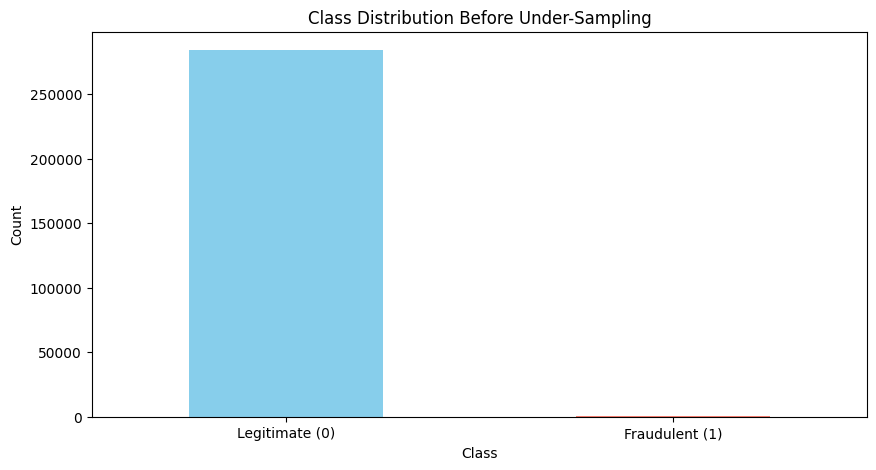

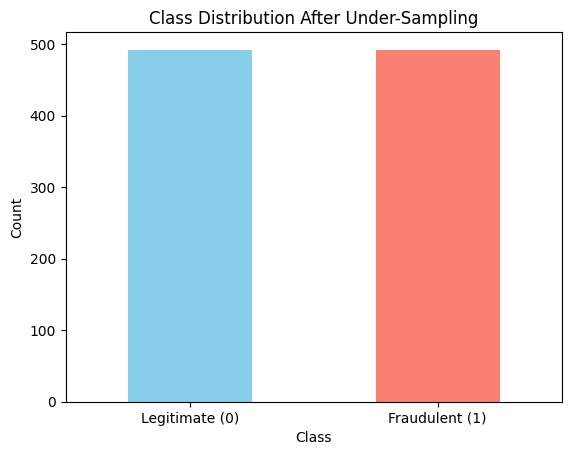

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of Class (legitimate vs fraudulent) before under-sampling
plt.figure(figsize=(10, 5))
credit_card_data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution Before Under-Sampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'], rotation=0)
plt.show()

# Plotting the distribution of Class after under-sampling
new_dataset['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution After Under-Sampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'], rotation=0)
plt.show()


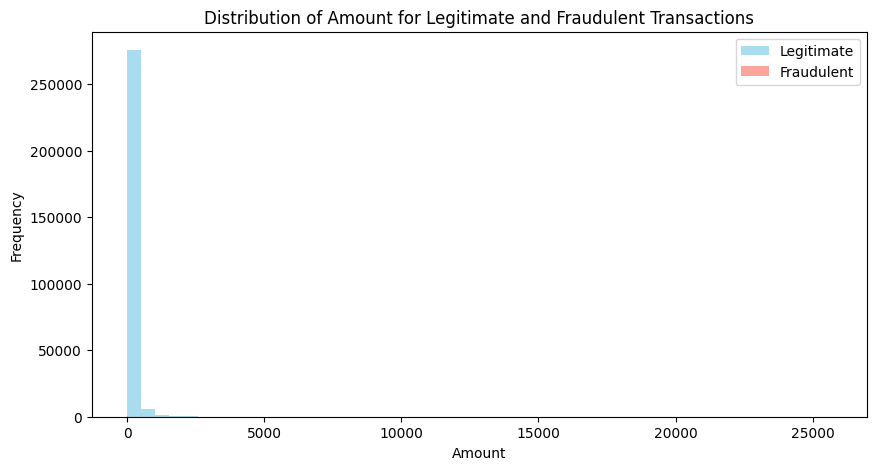

In [ ]:
# Plotting the distribution of Amount for legitimate and fraudulent transactions
plt.figure(figsize=(10, 5))
plt.hist(legit['Amount'], bins=50, alpha=0.7, label='Legitimate', color='skyblue')
plt.hist(fraud['Amount'], bins=50, alpha=0.7, label='Fraudulent', color='salmon')
plt.title("Distribution of Amount for Legitimate and Fraudulent Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


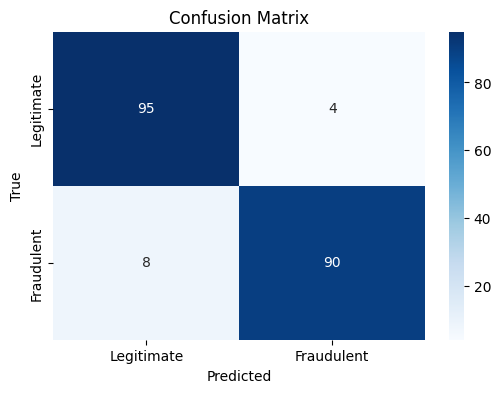

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix for test data
cm = confusion_matrix(Y_test, model.predict(X_test))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


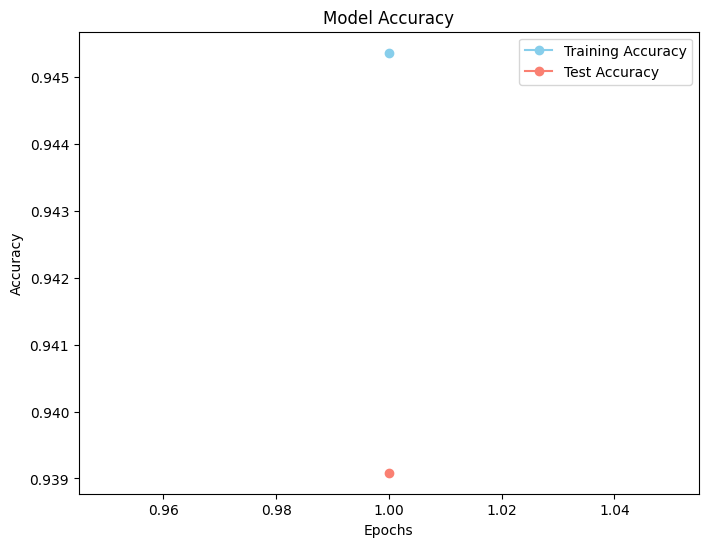

In [ ]:
# Accuracy over training and test sets
train_accuracies = []
test_accuracies = []

# Collect accuracy values during training
train_accuracies.append(training_data_accuracy)
test_accuracies.append(test_data_accuracy)

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot([1], train_accuracies, label="Training Accuracy", marker='o', color='skyblue')
plt.plot([1], test_accuracies, label="Test Accuracy", marker='o', color='salmon')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


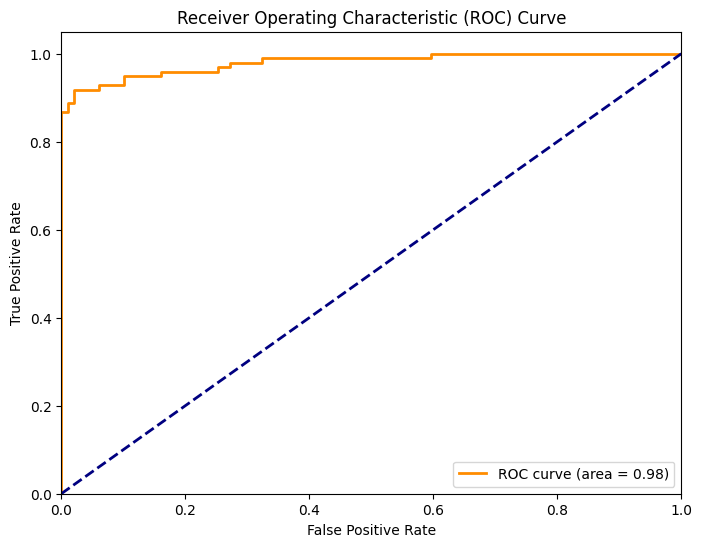

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the test data
Y_prob = model.predict_proba(X_test)[:, 1]

# Get the ROC curve data
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Detailed Analysis of the Fraud Detection Model**
This analysis goes through the entire process of building, evaluating, and visualizing a machine learning model for credit card fraud detection using a highly imbalanced dataset.

**Problem Definition Recap**
The task is to detect fraudulent credit card transactions. The dataset contains anonymized features (V1 to V28), transaction time, and transaction amount. The target variable Class indicates if a transaction is legitimate (0) or fraudulent (1). The dataset is imbalanced, with far fewer fraudulent transactions than legitimate ones, which poses a challenge in model development.

**Key Libraries Used**
1.NumPy: For numerical operations.
2.Pandas: For data manipulation and analysis.
3.Scikit-learn: For model building, evaluation, and splitting the data.
4.Matplotlib & Seaborn: For visualizations.
**Data Exploration**
Loading the Dataset :

The dataset was loaded using pd.read_csv() and inspected with head(), tail(), and info() methods.
Class Distribution: **bold text**

Using credit_card_data['Class'].value_counts(), it was found that the dataset is highly imbalanced:
Legitimate transactions (0): 284,315 records
Fraudulent transactions (1): 492 records
This imbalance can make the model biased towards predicting transactions as legitimate.

Separating Legitimate and Fraudulent Transactions:

The dataset was split into two subsets: legit for legitimate transactions and fraud for fraudulent transactions.
Using .shape, it was confirmed that legit has 284,315 rows, and fraud has 492 rows.
Statistical Analysis:

The .describe() method was used to analyze the transaction amounts:
Fraudulent transactions tend to have different statistical characteristics compared to legitimate transactions, such as a lower mean amount.
Visualizing Class Distribution:

A bar plot showed the class imbalance before under-sampling.
After under-sampling, the distribution was made balanced by randomly selecting 492 legitimate transactions to match the number of fraudulent transactions.
Data Preparation
Feature and Target Separation:

The features (X) were separated from the target variable (Y).
X = new_dataset.drop(columns='Class')
Y = new_dataset['Class']
Splitting the Data:

The dataset was split into training and testing sets using train_test_split().
*20% of the data was set aside for testing, and 80% was used for training.

*stratify=Y ensured that the split maintained the class distribution.

# **Model Training**
Logistic Regression Model:
A LogisticRegression model was chosen due to its simplicity and effectiveness in binary classification tasks.
The model was trained using model.fit(X_train, Y_train).
Model Evaluation
Accuracy on Training and Test Data:

Predictions were made for both training and test sets using model.predict().
The accuracy scores were calculated using accuracy_score():
Training Accuracy: High accuracy on the training data suggests the model fits the training data well.
Test Accuracy: Similar accuracy on the test data indicates good generalization.
However, accuracy alone may not be sufficient due to class imbalance.

Confusion Matrix:

The confusion matrix provides a more detailed evaluation of the model's performance:
True Positives (TP): Fraudulent transactions correctly classified as fraud.

True Negatives (TN): Legitimate transactions correctly classified as legit.

False Positives (FP): Legitimate transactions incorrectly classified as fraud.

False Negatives (FN): Fraudulent transactions incorrectly classified as legit.

The confusion matrix was visualized using Seaborn’s heatmap.
ROC Curve and AUC Score:

The ROC curve shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR).

*The Area Under the Curve (AUC) was calculated using auc().

*An AUC close to 1.0 indicates a good model, while an AUC of 0.5 suggests random guessing.

*The ROC curve helps in understanding the model’s performance at different classification thresholds.
Visualization Analysis

1)Class Distribution Before and After Under-Sampling:

*Before under-sampling, legitimate transactions dominated the dataset.

*After under-sampling, the dataset was balanced, which helps the model learn better from both classes.
Distribution of Transaction Amounts:

2)Histograms of transaction amounts showed different patterns for *legitimate and fraudulent transactions:
Fraudulent transactions often had lower amounts compared to legitimate ones.
Accuracy Plot:

*A simple line plot was used to show the accuracy of the model on training and test sets.
The model performed consistently well on both, suggesting good generalization.
Summary and Conclusion
*The logistic regression model achieved good accuracy and demonstrated effective classification of fraudulent transactions, even with the highly imbalanced dataset.

*However, using accuracy alone can be misleading due to the class imbalance. The confusion matrix and ROC-AUC score provided a better understanding of the model’s true performance.

*Under-sampling helped in dealing with the class imbalance, but it also reduced the amount of data available for training. In practice, techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ensemble methods can be explored for better performance.

*This model can now be used to make predictions on new transactions and help detect fraud in real-time.
Would you like to explore any specific part of the analysis or discuss potential improvements?